# 대회소개 및 목적

<p align="center"><img src="https://ir.nhqv.com/img/sub/intro_ci.png"/></p> 

이 대회는 NH투자증권에서 개최하는 **"제2회 NH투자증권 빅데이터 경진대회 - 데이터 문화가 되다"** 입니다.  

NH투자증권에서 제공하는 5가지의 데이터셋을 토대로 고객들의 주식 보유기간을 예측하고 이를 활용한 서비스 아이디어를 제안하는 것이 대회의 목적입니다.  

예선, 본선, 결선을 통해 진행되며 예선을 통과한 50팀에서 16팀을 선발하여 결선에 진출합니다.  

2020년의 데이터를 토대로 2021년의 주식 보유기간을 예측하는 것이 목적입니다.  
따라서 대회 개최측에서는 외부 데이터를 사용하는 것을 적극 권장하고 있으며 외부 데이터 사용시 모든 2021년 데이터를 사용하지 않도록 유의하고 있습니다.


![](https://drive.google.com/uc?id=1Vh60FlQsg3uJnMf1jqP97Y1z7qk2gLsK)

고객들의 투자자산과 무브머니가 계속해서 증가하는 추세에서 증권사는 고객들의 최근 투자패턴 변화에 집중하고 있습니다.  
NH투자증권에서는 고객의 변화된 투자패턴을 이해하고 이에 특화된 서비스를 제공하기를 원합니다.

## 평가방식

이번 대회의 평가방식은 예선, 본선, 결선별로 평가방식이 구분되어집니다.

### 예선
- 데이콘에서 진행하며 아래 평가지표로 상위 50팀 선발
- 주식 보유기간 예측결과 값을 private 리더보드 평가 (80%)
- 코드 모델 개발 설명서 평가 (20%)
- 주의사항
  - 주석과 코드는 모두 UTF-8 인코딩을 사용해야함
  - 반드시 코드에 '/data', 데이터 입/출력 경로를 포함해야함
  - 개발환경, 라이브러리 버전 기재

### 본선
- 본선 진출자는 서비스 아이디어 제안서(ppt)를 반드시 제출
- 총 4가지의 평가지표로 상위 16팀 선정
  - 창의성 : 아이디어, 차별성, 참신성
  - 과정성 : 결과 도출까지의 논리성
  - 적합성 : 구현 알고리즘/결과에 대한 해석
  - 정확성(정량평가) : 알고리즘 오차 점수 - RMSE

### 결선
- 결선은 쇼케이스로 진행되며 본선 통과 16팀에서 상위 6팀을 수상 (나머지는 입선)
- 평가지표
  - A. 아이디어 실현 가능성(30%)  
    - 아이디어가 실제 실현 가능성이 있는가
    - 아이디어가 비즈니스적 임팩트를 기대할 수 있는가

  - B. 논리적 일관성(30%)
    - 아이디어 전개 과정에서 탄탄한 자료로 이어져 있는가
    - 근거 있는 자료를 제시하고 적합하게 사용되었는가

  - C. 내용의 창의성(20%)
    - 주제에 대한 독특한 아이디어와 창의적인 관점이 제시되어 있는가
    - 새로운 발상, 독특한 콘셉트 요소가 있는가

  - D. 자료의 완결성(10%)
    - 보고서가 성의 있고 짜임새 있게 구성되어 있는가
    - 참가자의 노력이 잘 드러나는가

  - E. 발표 능력(10%)
    - 발표가 자신감 있고 자연스러운가
    - Q&A에 대한 대응이 매끄럽고, 논리적으로 문제가 없는가


## 정확도 평가지표 (RMSE)
예선 및 본선에서 평가지표로 활용되는 지표는 RMSE입니다.  

### 평균 제곱근 편자 - RMSE (Root Mean Squared Error)

$$
\text{RMSE} = \sqrt{\frac{\sum_{i=1}^{N}{(Y_{i}-\widehat{Y_{i}}})^2}{N}}
$$

- $N$ : 데이터 개수
- $Y_i$ : 보유일수 실제값
- $\widehat{Y_i}$ : 보유일수 예측값



In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import platform
import missingno as msno
from matplotlib import font_manager, rc
from tqdm import tqdm_notebook, tqdm

## Settings

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [147]:
# font settings - local (로컬 실행시 각주제거하고 font settings - colab 주석처리)
"""
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False
"""

# font settings - colab
plt.rc('font', family='NanumBarunGothic') 

# pandas 부동소수점
pd.options.display.float_format = '{:.4f}'.format

# seaborn palette setting
palettes = sns.color_palette("Paired", 9)
sns.set_palette('muted')

# python warning ignore setting
warnings.filterwarnings('ignore')

# tqdm setting
tqdm.pandas()

# data input, output path setting
INPUT_PATH = 'drive/MyDrive/dataset/dacon/nh/'
OUTPUT_PATH = 'drive/MyDrive/dataset/dacon/nh/submisions/'

In [4]:
os.listdir(INPUT_PATH)

['cus_info.csv',
 'iem_info.csv',
 'sample_submission.csv',
 'stk_hld_test.csv',
 'stk_hld_train.csv',
 'stk_bnc_hist.csv',
 'data column info.xlsx',
 'dacon_baseline.csv',
 'img',
 '.ipynb_checkpoints']

# 데이터 로드 및 확인

In [161]:
customers = pd.read_csv(INPUT_PATH+'cus_info.csv')
stock_info = pd.read_csv(INPUT_PATH+'iem_info.csv')
stock_rem_hist = pd.read_csv(INPUT_PATH+'stk_bnc_hist.csv')
train = pd.read_csv(INPUT_PATH+'stk_hld_train.csv')
test = pd.read_csv(INPUT_PATH+'stk_hld_test.csv')

In [6]:
customers.head(3)

,act_id,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd
0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9


In [7]:
stock_info.head(3)

,iem_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd
0,A000020,동화약품,14,2,99
1,A000080,하이트진로,14,2,1
2,A000180,성창기업지주,14,3,99


In [8]:
stock_rem_hist.head(3)

,act_id,bse_dt,iem_cd,bnc_qty,tot_aet_amt,stk_par_pr
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0000,2828000.0000,5000.0000
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0000,1390000.0000,5000.0000
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0000,2982490.0000,5000.0000


In [9]:
train.head(3)

,act_id,iem_cd,byn_dt,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5


In [10]:
test.head(3)

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0


## 데이터별 기본 정보 확인

각각의 데이터셋 별로 다양한 컬럼들이 존재합니다.  
데이터들에 대한 EDA를 진행하기 전 데이터별 기본적인 정보들을 확인해보겠습니다.

### 고객 정보 데이터 (cus_info.csv)

2020년 7월 이전 계좌개설 및 2020년 12월 기준 국내주식 자산 100만원 이상 고객 중 10,000명 임의 추출한 데이터들입니다


In [163]:
arguments = {}

sex = { 1: "남자", 2: "여자"}
age = { 1: "20-24세", 2: "25-29세", 3: "30-34세", 4: "35-39세", 5: "40-44세", 6: "45-49세", 7: "50-54세", 8: "55-59세", 9: "60-64세" }
invest_type = { 0: "정보제공미동의", 1: "안정형", 2: "안정추구형", 3: "위험중립형", 4: "적극투자형", 5: "공격투자형", 9: "전문투자자형"}
asset_range = { 1: "0원이상~1천만원 미만", 2: "1천만원 이상~3천만원 미만", 3: "3천만원 이상~5천만원 미만", 4: "5천만원 이상~1억원 미만", 5: "1억원 이상~3억원 미만", 6: "3억원 이상"}
major_product = { 0: "Only CMA", 2: "국내주식", 3: "해외주식", 5: "금속", 6: "국내채권", 8: "펀드", 9: "ELS or DLS", 10: "신탁_퇴직연금", 11: "RP", 12: "발행어음", 15: "신용대출"}
life_stage = { 2: "사회초년생", 3: "가족형성기(남자)", 4: "가족형성기(여자)", 5: "가족성숙기(직장인)", 6: "가족성숙기(주부)", 7: "가족성숙기(남자)", 8: "가족성숙기(여자)", 9: "은퇴기"}
grade = { 1: "탑클래스", 2: "골드", 3: "로얄", 4: "그린", 5: "블루", 9: "등급 미정의"}
duration = { 1: "6개월 미만", 2: "6개월~1년 미만", 3: "1년~3년 미만", 4: "3년~5년 미만", 5: "5년~10년 미만", 6: "10년 이상" }
major_type = { 1: "건설업", 2: "금융업", 3: "기계", 4: "방송, 통신", 5: "서비스, 오락, 문화", 6: "운송, 운수", 7: "유통", 
              8: "의료, 의약", 9: "전기, 전자", 10: "제조", 11: "철강", 12: "화학", 13: "IT", 14: "기타", 15: "혼합", 16: "비매매" }

arguments['sex'] = sex
arguments['age'] = age
arguments['invest'] = invest_type
arguments['asset'] = asset_range
arguments['major_prod'] = major_product
arguments['life_stage'] = life_stage
arguments['grade'] = grade
arguments['duration'] = duration
arguments['major_type'] = major_type

In [164]:
# missing value change to Nan
customers['ivs_icn_cd'] = customers['ivs_icn_cd'].progress_apply(lambda x: None if x == 99 or np.isnan(x) else int(x))
customers['tco_cus_grd_cd'] = customers['tco_cus_grd_cd'].progress_apply(lambda x: None if x == 99 or np.isnan(x) else int(x))

100%|██████████| 10000/10000 [00:00<00:00, 321760.12it/s]


In [14]:
print(f'전체 고객 수 : {len(customers)}명')

전체 고객 수 : 10000명


전체 분석가능한 고객의 수는 앞서 소개한 바와 같이 10,000명입니다.  
이번에는 고객의 성별과 연령 분포를 확인하겠습니다.

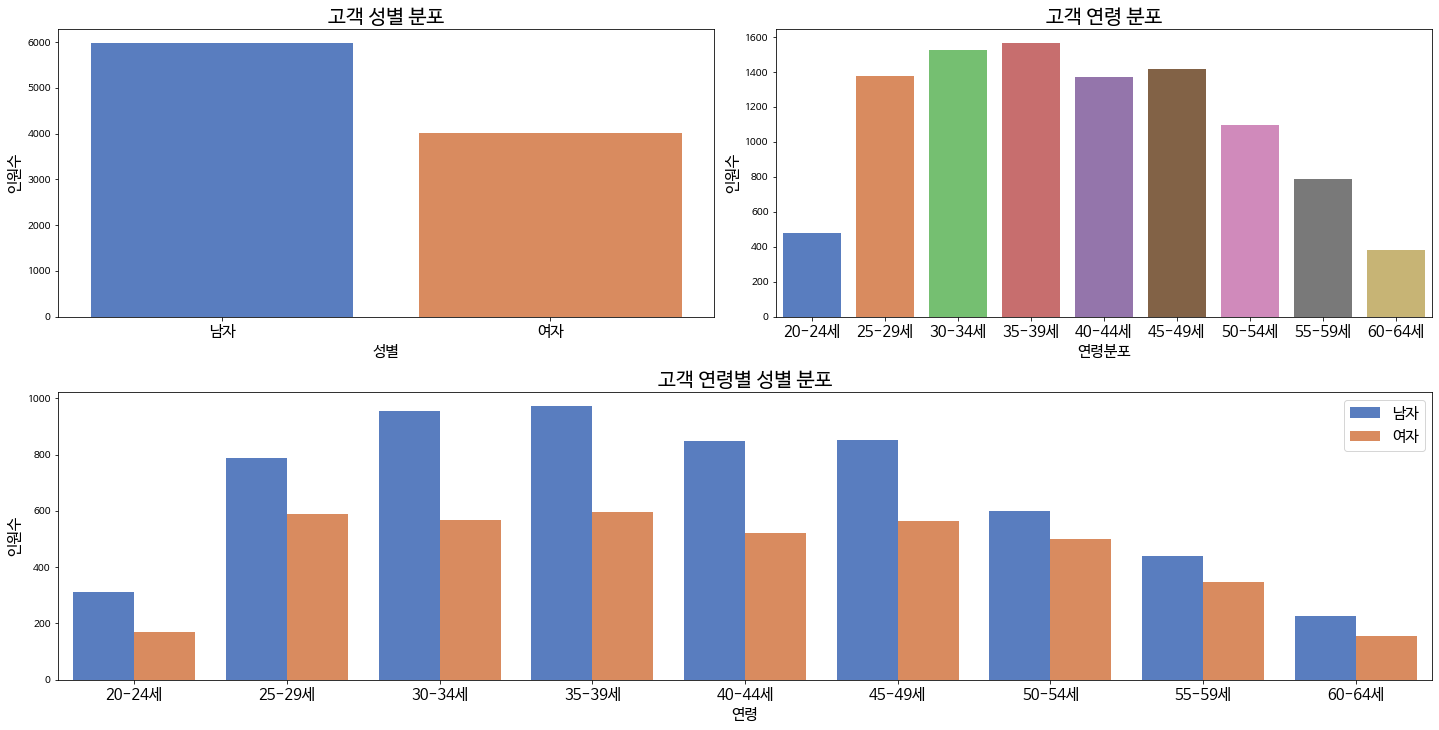

In [183]:
fig = plt.figure(figsize=(50, 50))

ax = [None for _ in range(3)]

ax[0] = plt.subplot2grid((10, 5), (0, 0), colspan=1)
ax[1] = plt.subplot2grid((10, 5), (0, 1), colspan=1)
ax[2] = plt.subplot2grid((10, 5), (1, 0), colspan=2)

# sex plot
sns.countplot(data=customers, x=customers.sex_dit_cd.map(arguments['sex']), ax=ax[0])
ax[0].set_title("고객 성별 분포", fontsize=20)
ax[0].set_xlabel("성별", fontsize=15)
ax[0].set_ylabel("인원수", fontsize=15)
ax[0].set_xticklabels(fontsize=15, labels=arguments['sex'].values())

# age plot
sns.countplot(data=customers, x=customers.cus_age_stn_cd.map(arguments['age']), ax=ax[1], order=arguments['age'].values())
ax[1].set_title("고객 연령 분포", fontsize=20)
ax[1].set_xlabel("연령분포", fontsize=15)
ax[1].set_ylabel("인원수", fontsize=15)
ax[1].set_xticklabels(fontsize=15, labels=arguments['age'].values())

# age X sex
sns.countplot(data=customers, x=customers.cus_age_stn_cd.map(arguments['age']), ax=ax[2], order=arguments['age'].values(), hue=customers.sex_dit_cd.map(arguments['sex']))
ax[2].set_title("고객 연령별 성별 분포", fontsize=20)
ax[2].set_xlabel("연령", fontsize=15)
ax[2].set_ylabel("인원수", fontsize=15)
ax[2].set_xticklabels(fontsize=15, labels=arguments['age'].values())
ax[2].get_legend().set_title('성별')
ax[2].legend(fontsize=15)

fig.tight_layout()
plt.show()

전체 고객 중 남성 고객이 여성 고객보다 많은 것을 알 수 있습니다. 그리고 전체 연령에서도 남성 고객이 여성 고객보다 많은 것을 알 수 있습니다.  
연령 분포는 가장 많은 연령대는 35 ~ 39세이고 가장 적은 연령대는 60 ~ 64세 인 것을 알 수 있습니다.

다음은 연령대, 성별 기준의 투자성향의 분포입니다. (결측치는 모두 제거한 그래프입니다.)

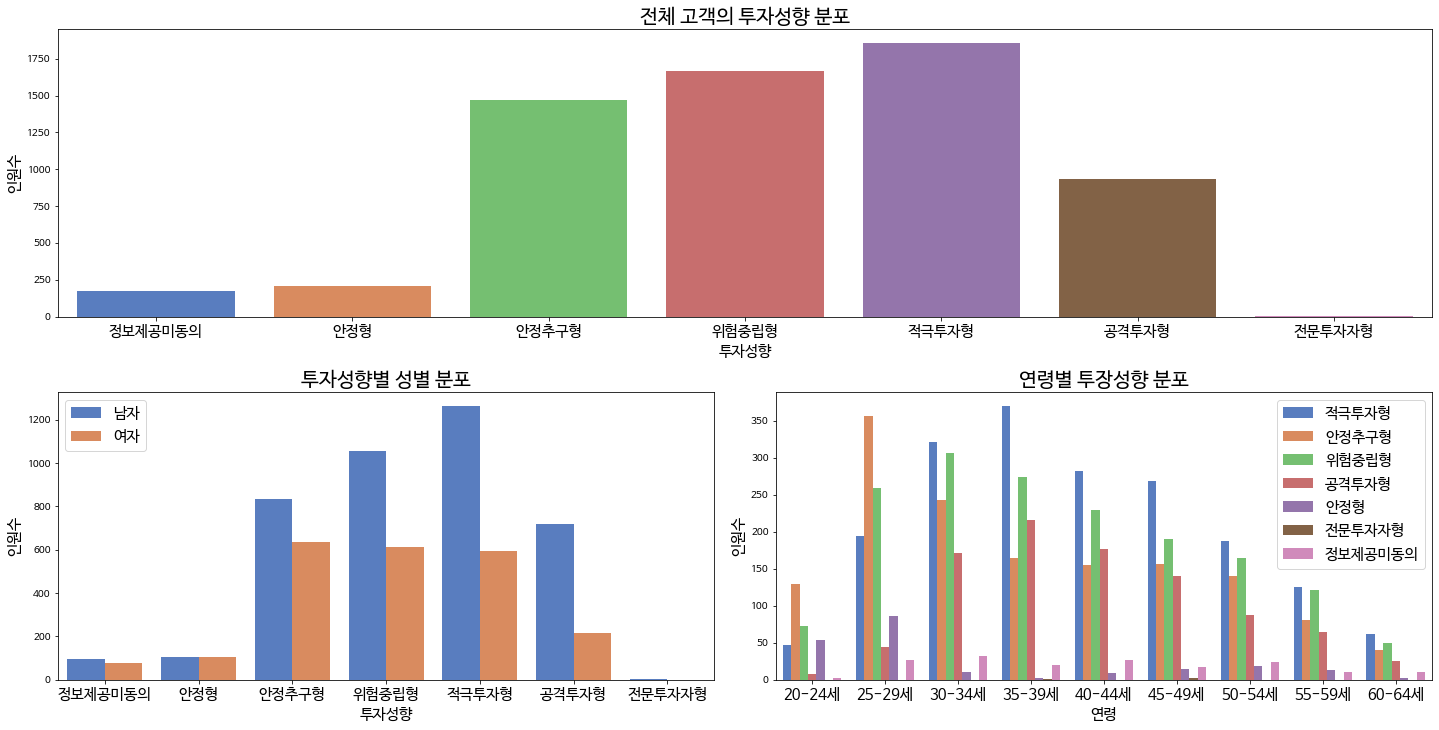

In [184]:
fig = plt.figure(figsize=(50, 50))

ax = [None for _ in range(3)]

ax[0] = plt.subplot2grid((10, 5), (0, 0), colspan=2)
ax[1] = plt.subplot2grid((10, 5), (1, 0), colspan=1)
ax[2] = plt.subplot2grid((10, 5), (1, 1), colspan=1)

# investment type plot
sns.countplot(data=customers, x=customers.ivs_icn_cd.map(arguments['invest']), ax=ax[0], order=arguments['invest'].values())
ax[0].set_title("전체 고객의 투자성향 분포", fontsize=20)
ax[0].set_xticklabels(arguments['invest'].values(), fontsize=15)
ax[0].set_ylabel("인원수", fontsize=15)
ax[0].set_xlabel("투자성향", fontsize=15)

# invest type X sex
sns.countplot(data=customers, x=customers.ivs_icn_cd.map(arguments['invest']), ax=ax[1], order=arguments['invest'].values(), hue=customers.sex_dit_cd.map(arguments['sex']))
ax[1].set_title("투자성향별 성별 분포", fontsize=20)
ax[1].set_xticklabels(arguments['invest'].values(), fontsize=15)
ax[1].set_ylabel("인원수", fontsize=15)
ax[1].set_xlabel("투자성향", fontsize=15)
ax[1].legend(fontsize=15)

# invest type X age
"""
sns.countplot(data=customers, x=customers.ivs_icn_cd.map(arguments['invest']), ax=ax[2], order=arguments['invest'].values(), hue=customers.cus_age_stn_cd.map(arguments['age']))
ax[2].set_title("투자성향별 성별 분포", fontsize=20)
ax[2].set_xticklabels(arguments['invest'].values(), fontsize=15)
ax[2].set_ylabel("인원수", fontsize=15)
ax[2].set_xlabel("투자성향", fontsize=15)
ax[2].legend(fontsize=15)
"""
sns.countplot(data=customers, x=customers.cus_age_stn_cd.map(arguments['age']), ax=ax[2], order=arguments['age'].values(), hue=customers.ivs_icn_cd.map(arguments['invest']))
ax[2].set_title("연령별 투장성향 분포", fontsize=20)
ax[2].set_xlabel("연령", fontsize=15)
ax[2].set_ylabel("인원수", fontsize=15)
ax[2].set_xticklabels(fontsize=15, labels=arguments['age'].values())
ax[2].legend(fontsize=15)


fig.tight_layout()
plt.show()